# Decision tree for regression

In this notebook, we look at how **decision trees** work in **regression**
problems. We show differences with the decision trees previously presented in
a classification setting.

First, we load the **penguins dataset** specifically for solving a regression
problem.

In [16]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

To illustrate how decision trees predict in a regression setting, we
will **create a synthetic dataset** containing all possible flipper length from
the minimum to the maximum of the original data.

In [17]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

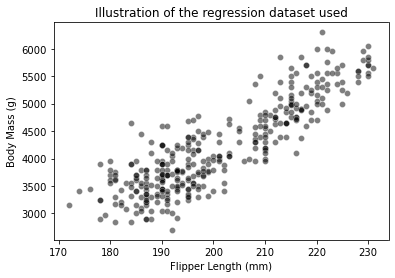

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

We will first illustrate the difference between a linear model and a decision
tree.

In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

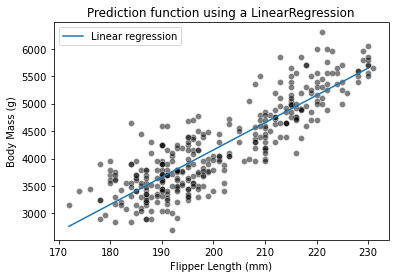

In [20]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

On the plot above, we see that a non-regularized `LinearRegression` is able
to fit the data. A feature of this model is that all new predictions
will be on a line.

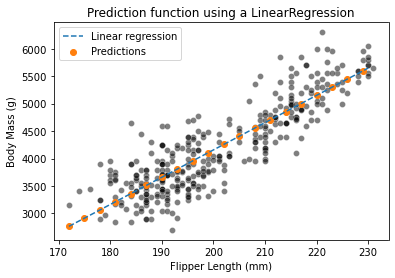

In [21]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

While **linear models** are **parametric models**, **decision trees** are **non-parametric models**:
they do **not make assumptions about the way data is distributed**.
This will affect the prediction scheme. Repeating the above experiment for decision trees highlights the differences.

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

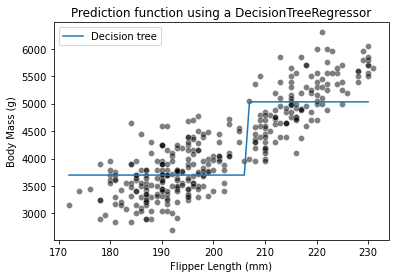

In [23]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

We see that the **decision tree model** does **no**t have an ***a priori* distribution**
for the data and we do not end-up with a straight line to regress flipper
length and body mass.

Instead, we observe that the **predictions** of the tree are **piecewise constant**.
Indeed, our feature space was split into two partitions. Let's check the
tree structure to see what was the **threshold** found during the training.

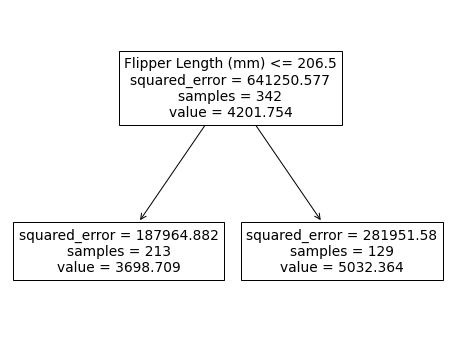

In [24]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=data_columns, ax=ax)

The **threshold** for our **feature (flipper length)** is 202.5 mm. The **predicted
values** on each side of the split are **two constants**: 3683.50 g and 5023.62 g.
These values correspond to the **mean values of the training samples** in **each
partition**.

In classification, **increasing the depth of the tree** allows us to
get more complex decision boundaries.
Let's check the effect of increasing the depth in a regression setting:

In [27]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

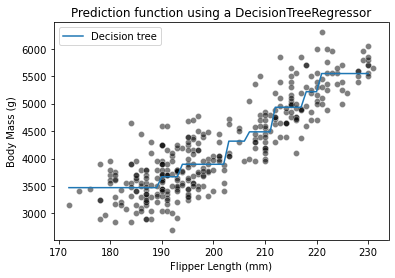

In [28]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

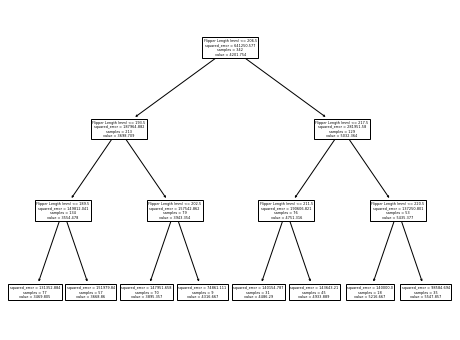

In [29]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=data_columns, ax=ax)

**Increasing the depth of the tree** will **increase** the **number of partition** with **piecewise constant sections**.

In this notebook, we highlighted the differences in behavior of a decision
tree used in a classification problem in contrast to a regression problem.